In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets
transaction_data = pd.read_csv("/content/transaction_data.csv")
purchase_data = pd.read_csv("/content/purchase_behaviour.csv")


In [3]:
# Identify top 3 most profitable products
top_products = transaction_data.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(3).reset_index()

In [4]:
# Merge transaction data with purchase behavior data
merged_data = transaction_data.merge(purchase_data, on="LYLTY_CARD_NBR")

In [5]:
# Identify the most loyal customer segment
loyal_customers = merged_data["LIFESTAGE"].value_counts().idxmax()
loyal_customers_segment = merged_data["PREMIUM_CUSTOMER"].value_counts().idxmax()

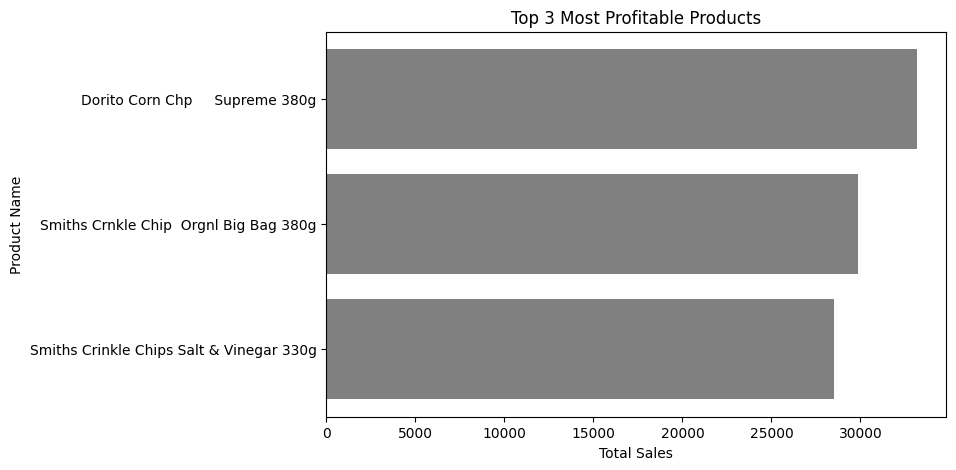

In [11]:
# Plot the top products
plt.figure(figsize=(8, 5))
plt.barh(top_products["PROD_NAME"], top_products["TOT_SALES"], color='grey')
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.gca().invert_yaxis()
plt.show()

<ipython-input-10-19d692e2d427>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=merged_data["LIFESTAGE"], order=merged_data["LIFESTAGE"].value_counts().index, palette="spring")


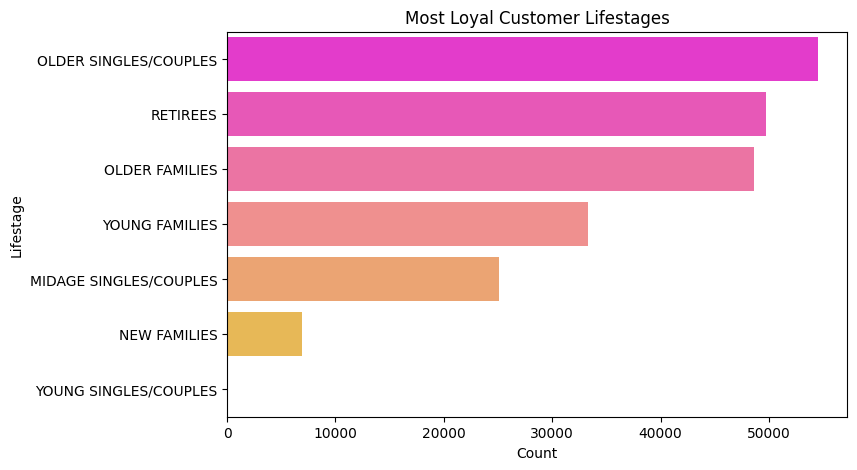

In [10]:
# Visualizing customer loyalty by lifestage
plt.figure(figsize=(8, 5))
sns.countplot(y=merged_data["LIFESTAGE"], order=merged_data["LIFESTAGE"].value_counts().index, palette="spring")
plt.xlabel("Count")
plt.ylabel("Lifestage")
plt.title("Most Loyal Customer Lifestages")
plt.show()

<ipython-input-12-3c82c8285e9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=merged_data["PREMIUM_CUSTOMER"], order=merged_data["PREMIUM_CUSTOMER"].value_counts().index, palette="viridis")


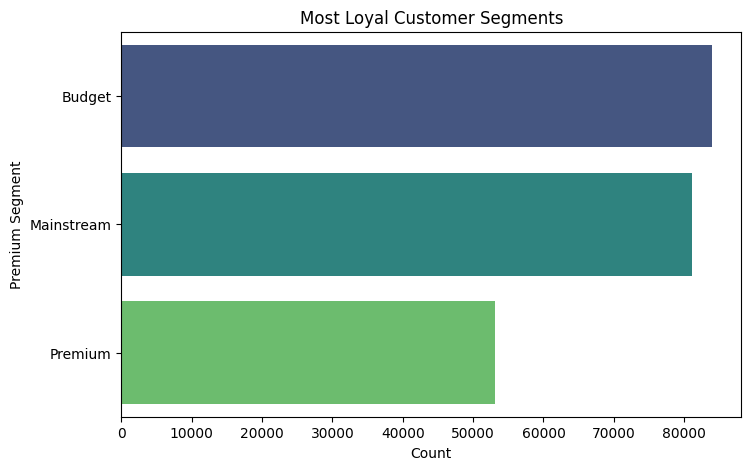

In [12]:
# Visualizing customer loyalty by premium segment
plt.figure(figsize=(8, 5))
sns.countplot(y=merged_data["PREMIUM_CUSTOMER"], order=merged_data["PREMIUM_CUSTOMER"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Premium Segment")
plt.title("Most Loyal Customer Segments")
plt.show()

In [14]:
# Summary
summary = f"""
Top 3 Most Profitable Products:
1. {top_products.iloc[0, 0]} - ₹{top_products.iloc[0, 1]:.2f}
2. {top_products.iloc[1, 0]} - ₹{top_products.iloc[1, 1]:.2f}
3. {top_products.iloc[2, 0]} - ₹{top_products.iloc[2, 1]:.2f}

Most Loyal Customers:
- Lifestage: {loyal_customers}
- Segment: {loyal_customers_segment}

Hypothesis:
Older singles and couples are the most loyal customers as they likely have stable purchasing habits
and prefer familiar brands. Mainstream buyers tend to choose well-known products for their balance
of affordability and quality.
"""

print(summary)



Top 3 Most Profitable Products:
1. Dorito Corn Chp     Supreme 380g - ₹33163.00
2. Smiths Crnkle Chip  Orgnl Big Bag 380g - ₹29854.00
3. Smiths Crinkle Chips Salt & Vinegar 330g - ₹28528.50

Most Loyal Customers:
- Lifestage: OLDER SINGLES/COUPLES
- Segment: Budget

Hypothesis:
Older singles and couples are the most loyal customers as they likely have stable purchasing habits 
and prefer familiar brands. Mainstream buyers tend to choose well-known products for their balance 
of affordability and quality.

